In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
!pip install xgboost
from xgboost import XGBClassifier 
import xgboost as xgb
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


<div style="
    background-color: #006666; 
    color: #FFD700; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    border: 2px solid #FFD700;
    width: fit-content;
">
    1. load data
</div>

In [2]:
train_data=pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test_data=pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")

<div style="
    background-color: #006666; 
    color: #FFD700; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    border: 2px solid #FFD700;
    width: fit-content;
">
    2. Data Exploration
</div>

In [3]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [6]:
train_data.describe(include="O")

,Surname,Geography,Gender
count,165034,165034,165034
unique,2797,3,2
top,Hsia,France,Male
freq,2456,94215,93150


### because of large data we will take small abount of it to fast training only

In [7]:
train_data=train_data[0:10000]

<div style="
    background-color: #006666; 
    color: #FFD700; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    border: 2px solid #FFD700;
    width: fit-content;
">
    3. Data Cleaning
</div>

In [8]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
train_data.duplicated().sum()

0

In [10]:
#drop columns that havenot affect
lst=train_data[["id",
"CustomerId",
"Surname"]]
train_data.drop(lst,axis=1,inplace=True)

In [11]:
train_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


<div style="
    background-color: #006666; 
    color: #FFD700; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    border: 2px solid #FFD700;
    width: fit-content;
">
    4. Data Visulization
</div>

In [12]:
#divid feature
continuous = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']
categorical = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

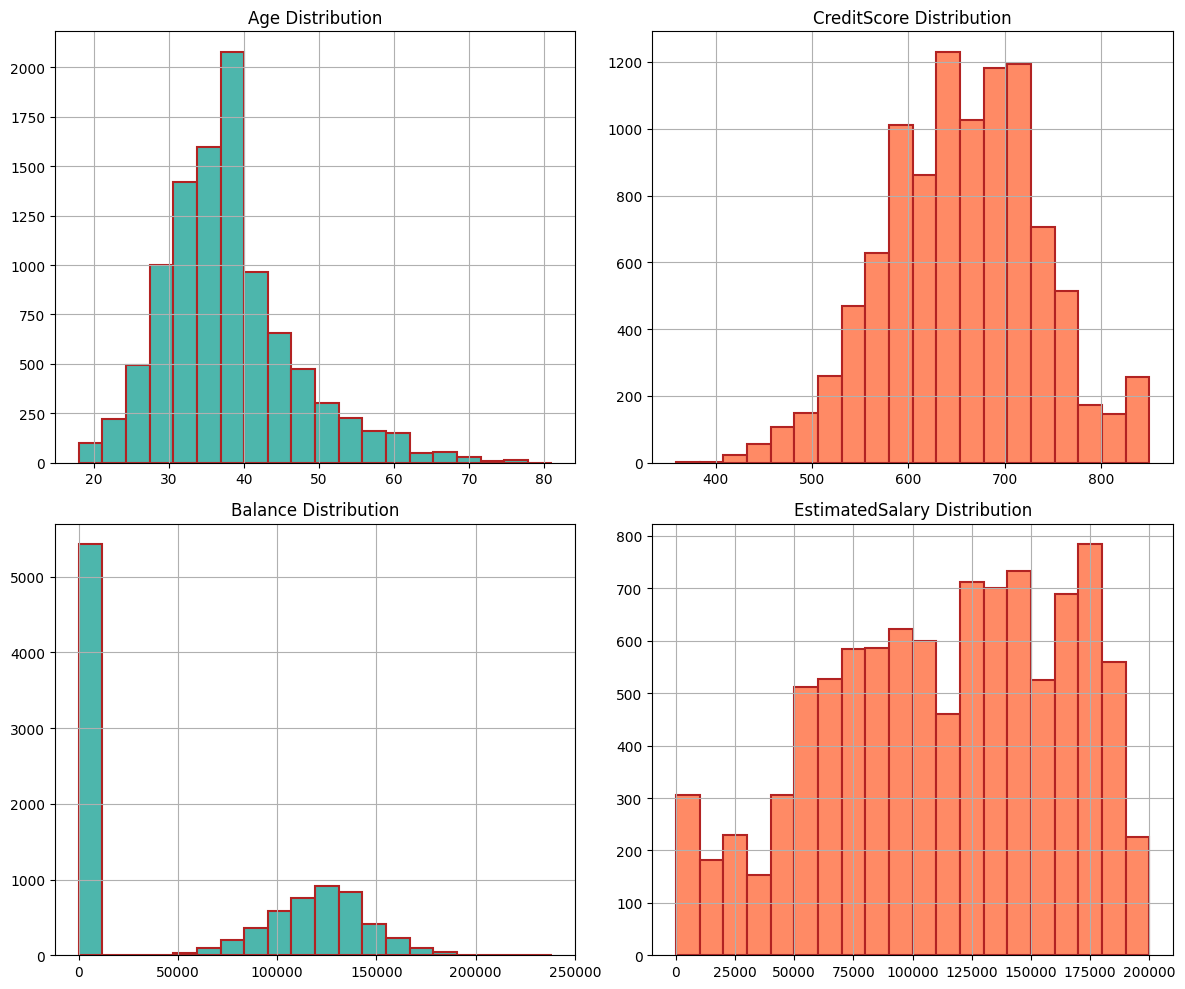

In [13]:
#visulization
colors = ['#4DB6AC', '#FF8A65', '#4DB6AC', '#FF8A65'] 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for ax, col, color in zip(axes.flatten(), continuous, colors):
    train_data[col].hist(ax=ax, bins=20, color=color, edgecolor='firebrick', linewidth=1.5)
    ax.set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

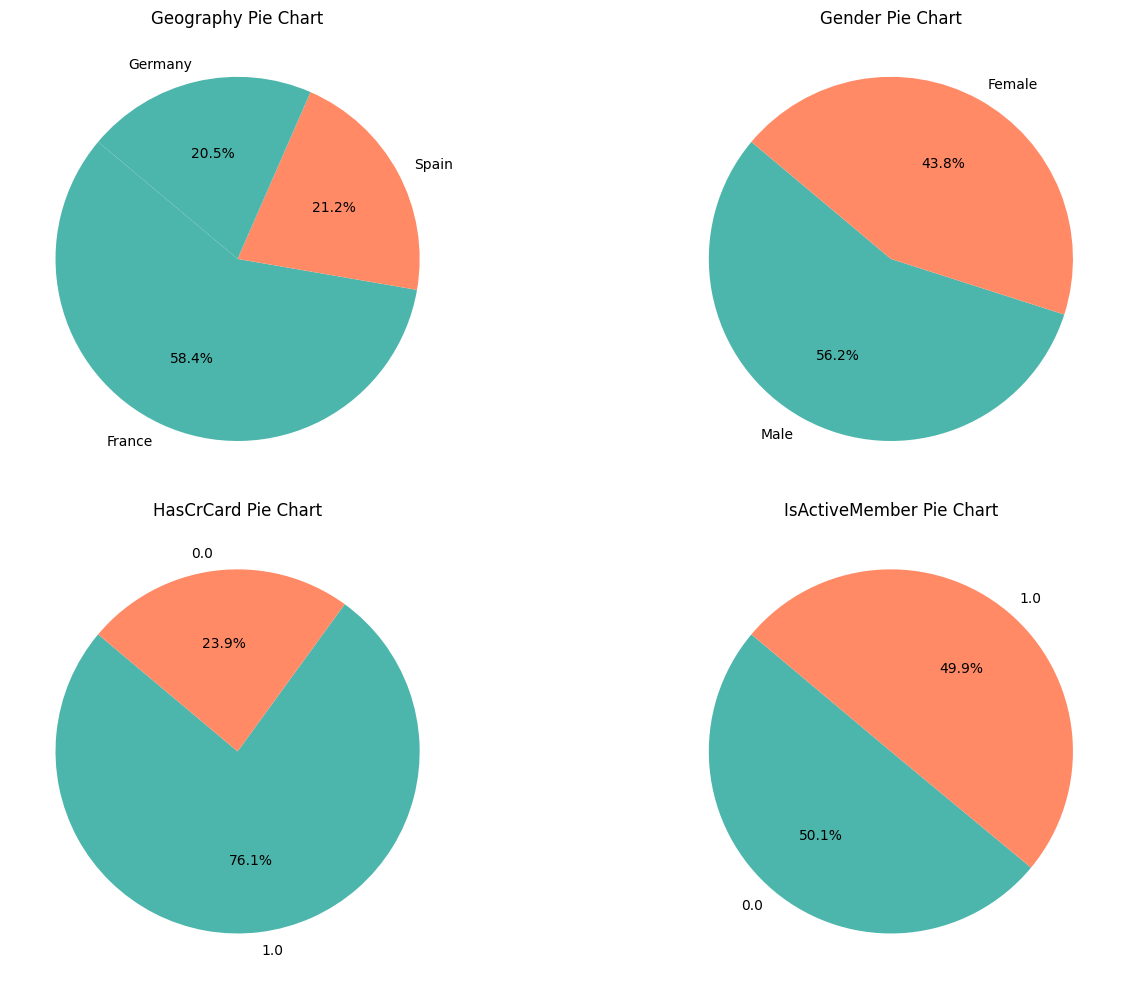

In [14]:
custom_colors = ['#4DB6AC', '#FF8A65', '#4DB6AC', '#FF8A65']

categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    counts = train_data[var].value_counts()
    

    colors = custom_colors[:len(counts)] if len(counts) <= len(custom_colors) else sns.color_palette("Pastel1", len(counts))
    
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'{var} Pie Chart')

plt.tight_layout()
plt.show()

* france is The biggest country where the customer resides .

* most customer's gender is male .

* most customers have card .



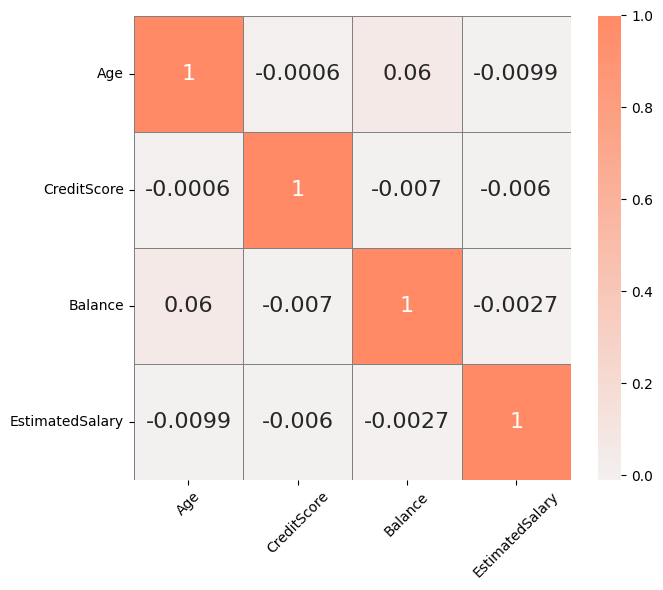

In [15]:
#fort know the relation between them
custom_cmap = sns.light_palette('#FF8A65', as_cmap=True)
#(Heatmap)
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(train_data[continuous].corr(),
            annot=True,
            annot_kws={'fontsize': 16},
            cmap=custom_cmap,  
            ax=ax,
            linewidths=0.5,  
            linecolor='gray')  

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)  

plt.tight_layout()  
plt.show()

In [16]:
def create_countplots(data, columns):
    sns.set(style="darkgrid") 
    
    num_plots = len(columns)
    num_rows = 2
    num_cols = 3

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
    
    custom_palette = ['#4DB6AC', '#FF8A65']
    
    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        
        sns.countplot(x=column, hue="Exited", data=data, ax=ax, palette=custom_palette)
        ax.set_xlabel(column)
        ax.set_ylabel("Count")
        ax.set_title("Countplot of " + column)
    
    plt.tight_layout()
    
    plt.show()


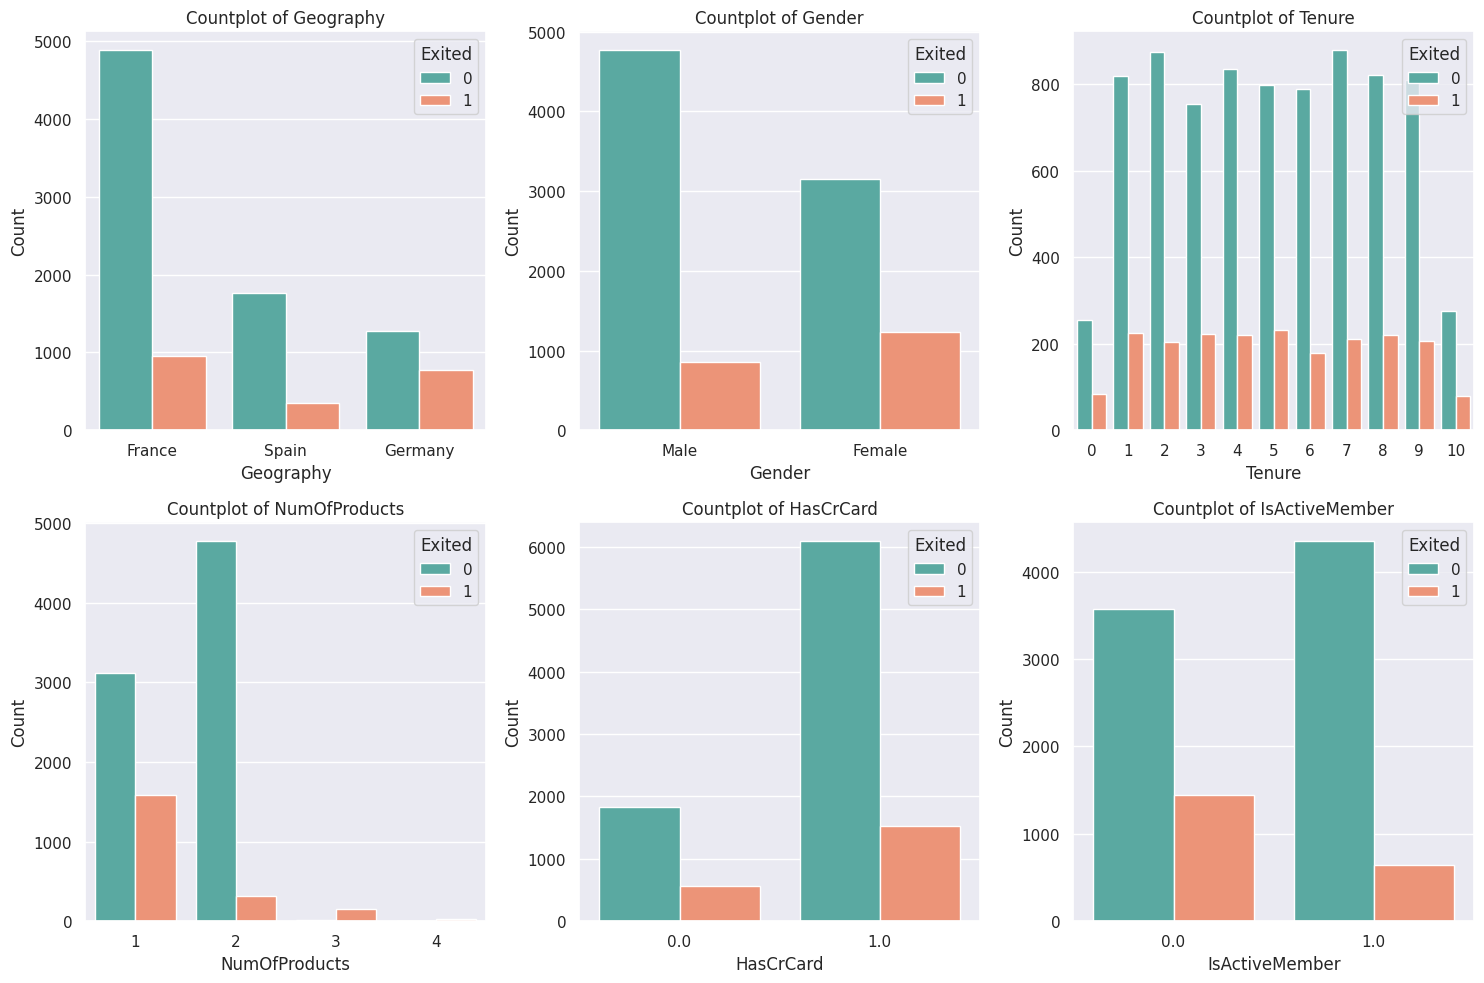

In [17]:
create_countplots(train_data,categorical )

## [](http://) now we can explain what is the output from this visulization
1. > Female customer are more likely to churn
1. > Num of years(tenure) dosnot seem to affect the churn rate


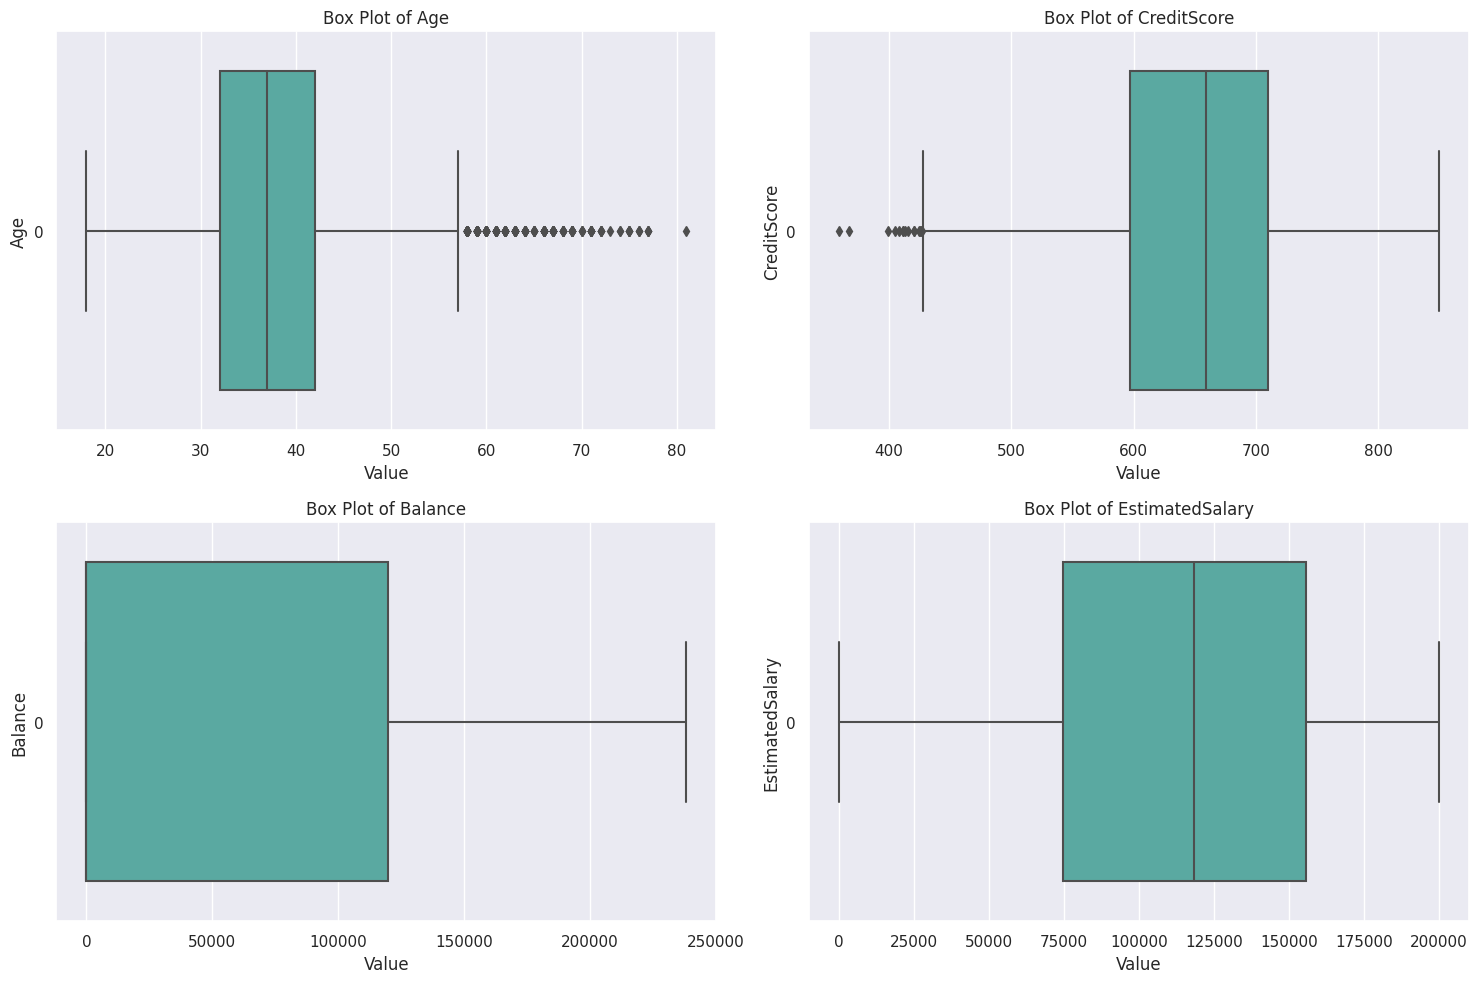

In [18]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(continuous, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=train_data[col], color='#4DB6AC', orient='h')  
    plt.title(f'Box Plot of {col}')
    plt.xlabel('Value')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#### there are outlier in age column and creaditscore

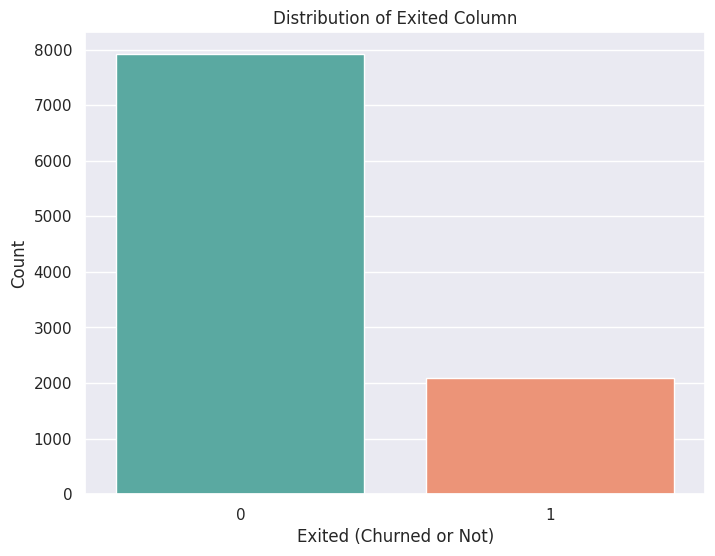

In [19]:
# Define the custom colors
palette = ['#4DB6AC', '#FF8A65']  # Greenish and Orange colors

# Visualize the "Exited" column with the custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=train_data, palette=palette)
plt.title('Distribution of Exited Column')
plt.xlabel('Exited (Churned or Not)')
plt.ylabel('Count')
plt.show()

### so the data imbalance

<div style="
    background-color: #006666; 
    color: #FFD700; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    border: 2px solid #FFD700;
    width: fit-content;
">
    5. Preprocessing
</div>

In [20]:
# Function to replace outliers using the IQR method
def replace_outliers(column):
    # Calculate the IQR
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the lower and upper bounds (capping)
    column = np.where(column < lower_bound, lower_bound, column)
    column = np.where(column > upper_bound, upper_bound, column)
    
    return column

# Iterate over each continuous variable and replace outliers
for column in continuous:
    train_data[column] = replace_outliers(train_data[column])


In [21]:
train_data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668.0,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627.0,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678.0,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581.0,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716.0,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,588.0,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,593.0,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,678.0,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,676.0,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,583.0,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [22]:
# Separate numerical and categorical columns
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()

# Remove 'Exited' column from numerical_cols if present
if 'Exited' in numerical_cols:
    numerical_cols.remove('Exited')


In [23]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])


In [24]:
train_data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668.0,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627.0,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678.0,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581.0,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716.0,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
5,588.0,Germany,Male,36.0,4,131778.58,1,1.0,0.0,136024.31,1
6,593.0,France,Female,30.0,8,144772.69,1,1.0,0.0,29792.11,0
7,678.0,Spain,Male,37.0,1,138476.41,1,1.0,0.0,106851.60,0
8,676.0,France,Male,43.0,4,0.00,2,1.0,0.0,142917.13,0
9,583.0,Germany,Male,40.0,4,81274.33,1,1.0,1.0,170843.07,0


In [25]:
X=train_data.drop("Exited",axis=1)
y=train_data["Exited"]

In [26]:
! pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)


smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' oversamples to match the majority class
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

print("Balanced training set shape:", X_train_res.shape)
print("Balanced target distribution:", pd.Series(y_train_res).value_counts())


Balanced training set shape: (12652, 13)
Balanced target distribution: Exited
0    6326
1    6326
Name: count, dtype: int64


## Now data is Balance

<div style="
    background-color: #006666; 
    color: #FFD700; 
    padding: 10px; 
    border-radius: 10px;
    text-align: center;
    font-size: 20px;
    font-weight: bold;
    border: 2px solid #FFD700;
    width: fit-content;
">
    6. Modeling
</div>

In [27]:
from sklearn.ensemble import StackingClassifier
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('xgb', xgb.XGBClassifier(random_state=42))
]
meta_model = LogisticRegression()

#Stacking
stacking_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_model  )

In [28]:
stacking_model.fit(X_train_res, y_train_res)
y_pred = stacking_model.predict(X_test_transformed)

print("Accuracy of Stacking Model:", accuracy_score(y_test, y_pred))

Accuracy of Stacking Model: 0.849


In [29]:
# Define parameter grid for RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20]
}

grid_search_rf = GridSearchCV(estimator=stacking_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_res, y_train_res)

print("Best parameters for RandomForest:", grid_search_rf.best_params_)


Best parameters for RandomForest: {'rf__max_depth': None, 'rf__n_estimators': 100}


In [30]:
# Evaluate on the test set
print("Best score:", grid_search_rf.best_score_)
y_pred_tuned = grid_search_rf.best_estimator_.predict(X_test_transformed)
print("Accuracy of Tuned Stacking Model:", accuracy_score(y_test, y_pred_tuned))

Best score: 0.9000257049737407
Accuracy of Tuned Stacking Model: 0.849


In [31]:
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'svm__C': [0.1, 1, 10],
    'xgb__learning_rate': [0.01, 0.1, 0.3]
}
# Apply GridSearchCV

grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

grid_search.fit(X_train_res, y_train_res)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters: {'rf__n_estimators': 200, 'svm__C': 0.1, 'xgb__learning_rate': 0.01}
Best score: 0.8995460395557746


In [32]:
# Evaluate on the test set
y_pred_tuned_1 = grid_search.best_estimator_.predict(X_test_transformed)
print("Accuracy of Tuned Stacking Model_1:", accuracy_score(y_test, y_pred_tuned_1))

Accuracy of Tuned Stacking Model_1: 0.8395


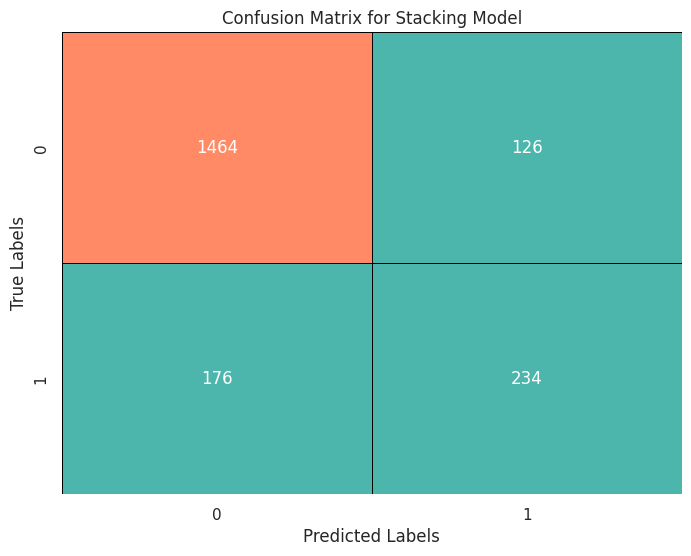

In [33]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_tuned)

cmap = sns.color_palette(["#4DB6AC", "#FF8A65"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, linewidths=0.5, linecolor='black')
plt.title("Confusion Matrix for Stacking Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

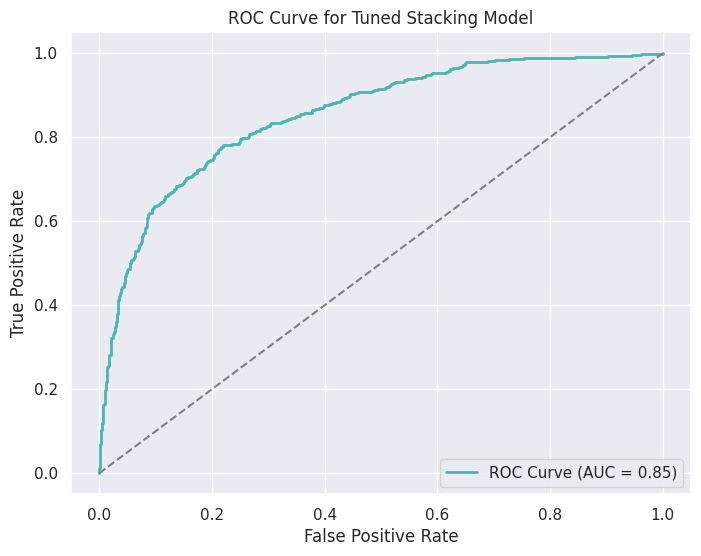

In [34]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = grid_search_rf.best_estimator_.predict_proba(X_test_transformed)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#4DB6AC', lw=2, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Tuned Stacking Model')
plt.legend(loc="lower right")
plt.show()

In [35]:
import joblib
# Save the model to a file
joblib.dump(grid_search_rf.best_estimator_, 'stacking_model.pkl')

print("Model saved as 'stacking_model.pkl'")


Model saved as 'stacking_model.pkl'
